# Simple Linear Regression


using data Salary_data.csv

Two values (Dependent - Salary VS Independent - Year of Exp

Load tthe dataset

In [1]:
getwd()

[1] "G:/Jupyter/R/ML"

In [4]:
data  <- read.csv("G:/Jupyter/R/ML/dataset/Salary_Data.csv")

In [5]:
head(data)

,YearsExperience,Salary
,<dbl>,<dbl>
1,1.1,39343
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.9,56642


## Splitting Data into training and testing

In [12]:
install.packages('caTools')
library(caTools)

Warning message:
"package 'caTools' is in use and will not be installed"


In [13]:
set.seed(1580)

We have to split only basaed on the Dependent variable

In [69]:
sample.split(Y = data$Salary, SplitRatio=2/3)

[1]  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
[13] FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE
[25] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE

In [49]:
split <- sample.split(Y = data$Salary, SplitRatio=2/3)
#it gves output as true and false we have to seperate 

In [37]:
?subset

In [56]:
train_set <- subset(x = data, split == TRUE) 

In [62]:
test_set <- subset(x = data, split == FALSE) 

In [59]:
train_set

,YearsExperience,Salary
,<dbl>,<dbl>
2,1.3,46205
6,2.9,56642
7,3.0,60150
8,3.2,54445
9,3.2,64445
10,3.7,57189
13,4.0,56957
15,4.5,61111
16,4.9,67938


In [63]:
test_set

,YearsExperience,Salary
,<dbl>,<dbl>
1,1.1,39343
3,1.5,37731
4,2.0,43525
5,2.2,39891
11,3.9,63218
12,4.0,55794
14,4.1,57081
20,6.0,93940
24,8.2,113812


Future Scaling (Normalising)

In [21]:
#scale(train_set[,])

SLR inbuilt function is "lm"

In [64]:

#?lm
#formula is Dependent vs(~) Independent

regressor <- lm(formula = Salary ~ YearsExperience,
   data = train_set)

In [65]:
summary(regressor)


Call:
lm(formula = Salary ~ YearsExperience, data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-8294.1 -3763.7   828.8  3720.4  7047.8 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      28890.5     2726.3   10.60 3.63e-09 ***
YearsExperience   8908.4      420.4   21.19 3.54e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5124 on 18 degrees of freedom
Multiple R-squared:  0.9615,	Adjusted R-squared:  0.9593 
F-statistic: 449.1 on 1 and 18 DF,  p-value: 3.537e-14


### If there is a "BlankSpace or '.' " at end of Coefficients instead of Stars the MODEL IS WRONG

### Predicting the result

In [66]:
predict(regressor, newdata = train_set)

2         6         7         8         9        10        13        15 
 40471.35  54724.73  55615.57  57397.24  57397.24  61851.42  64523.93  68978.11 
       16        17        18        19        21        22        23        26 
 72541.46  74323.13  76104.81  81449.83  89467.35  92139.86  99266.56 109065.76 
       27        28        29        30 
113519.94 114410.78 120646.63 122428.30

In [67]:
# Actual Test data
test_set

,YearsExperience,Salary
,<dbl>,<dbl>
1,1.1,39343
3,1.5,37731
4,2.0,43525
5,2.2,39891
11,3.9,63218
12,4.0,55794
14,4.1,57081
20,6.0,93940
24,8.2,113812


### Plotting Graph

In [44]:
install.packages('ggplot2')
library(ggplot2)

Warning message:
"package 'ggplot2' is in use and will not be installed"


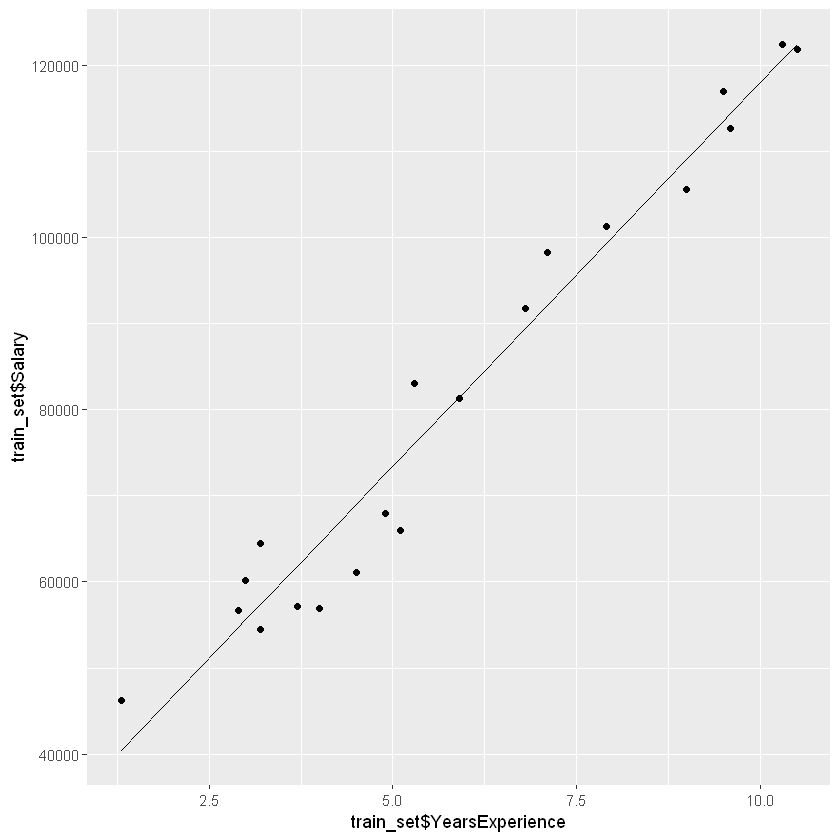

In [72]:
ggplot()+
    geom_point(aes(train_set$YearsExperience,
                   train_set$Salary))+
    geom_line(aes(train_set$YearsExperience,
                 predict(regressor, newdata = train_set)))

## using bonds dataset


In [74]:
bonds <- read.delim("G:/Jupyter/R/ML/dataset/bonds.txt")

In [75]:
bonds

Case,CouponRate,BidPrice
<int>,<dbl>,<dbl>
1,7.000,92.94
2,9.000,101.44
3,7.000,92.66
4,4.125,94.50
5,13.125,118.94
6,8.000,96.75
7,8.750,100.88
8,12.625,117.25
9,9.500,103.34


In [76]:
set.seed(1357)

In [81]:
#bidPrice is Dependent vs couponRate is independent 
sample  <- sample.split(Y = bonds$BidPrice, SplitRatio=0.7)

In [84]:
train_set <- subset(bonds, sample==T)
train_set

,Case,CouponRate,BidPrice
,<int>,<dbl>,<dbl>
3,3,7.000,92.66
5,5,13.125,118.94
6,6,8.000,96.75
7,7,8.750,100.88
8,8,12.625,117.25
10,10,10.125,106.25
11,11,11.625,113.19
12,12,8.625,99.44
14,14,10.500,108.31


In [86]:
test_set <- subset(bonds,sample == F)
test_set

,Case,CouponRate,BidPrice
,<int>,<dbl>,<dbl>
1,1,7.000,92.94
2,2,9.000,101.44
4,4,4.125,94.50
9,9,9.500,103.34
13,13,3.000,94.50
21,21,10.500,108.50
24,24,11.500,114.03
26,26,7.375,92.06
29,29,8.500,97.75


### building model

In [94]:
lm(formula = BidPrice ~ CouponRate,
                data = train_set)


Call:
lm(formula = BidPrice ~ CouponRate, data = train_set)

Coefficients:
(Intercept)   CouponRate  
     68.857        3.685  


In [88]:
summary(regression)


Call:
lm(formula = BidPrice ~ CouponRate, data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6536 -1.4412 -0.4359  1.4039 12.7746 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  68.8573     3.3262   20.70 6.47e-16 ***
CouponRate    3.6852     0.3466   10.63 3.90e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.569 on 22 degrees of freedom
Multiple R-squared:  0.8371,	Adjusted R-squared:  0.8297 
F-statistic: 113.1 on 1 and 22 DF,  p-value: 3.903e-10


In [93]:
predict(regression, newdata = test_set)

1         2         4         9        13        21        24        26 
 94.65357 102.02394  84.05865 103.86654  79.91282 107.55172 111.23691  96.03551 
       29        30        31 
100.18135 101.56329  98.79940

In [90]:
#to veriy the above result
test_set

,Case,CouponRate,BidPrice
,<int>,<dbl>,<dbl>
1,1,7.000,92.94
2,2,9.000,101.44
4,4,4.125,94.50
9,9,9.500,103.34
13,13,3.000,94.50
21,21,10.500,108.50
24,24,11.500,114.03
26,26,7.375,92.06
29,29,8.500,97.75


### plotting

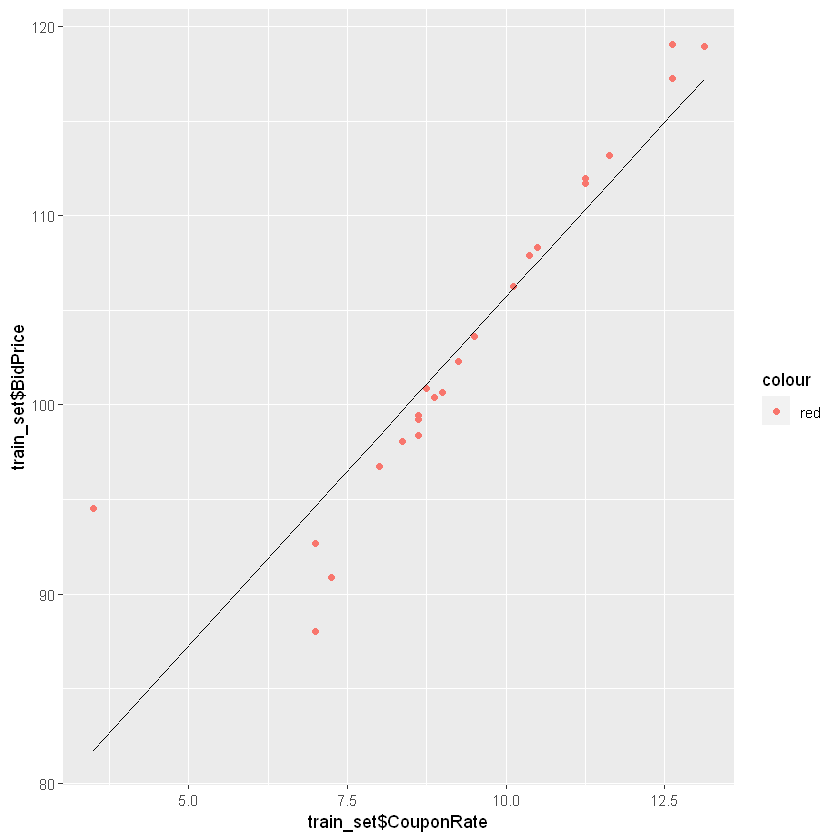

In [105]:
ggplot()+ geom_point(aes(x= train_set$CouponRate,y= train_set$BidPrice, color = 'red'))+
    geom_line(aes(train_set$CouponRate, predict(regression, newdata = train_set, color = 'blue')))


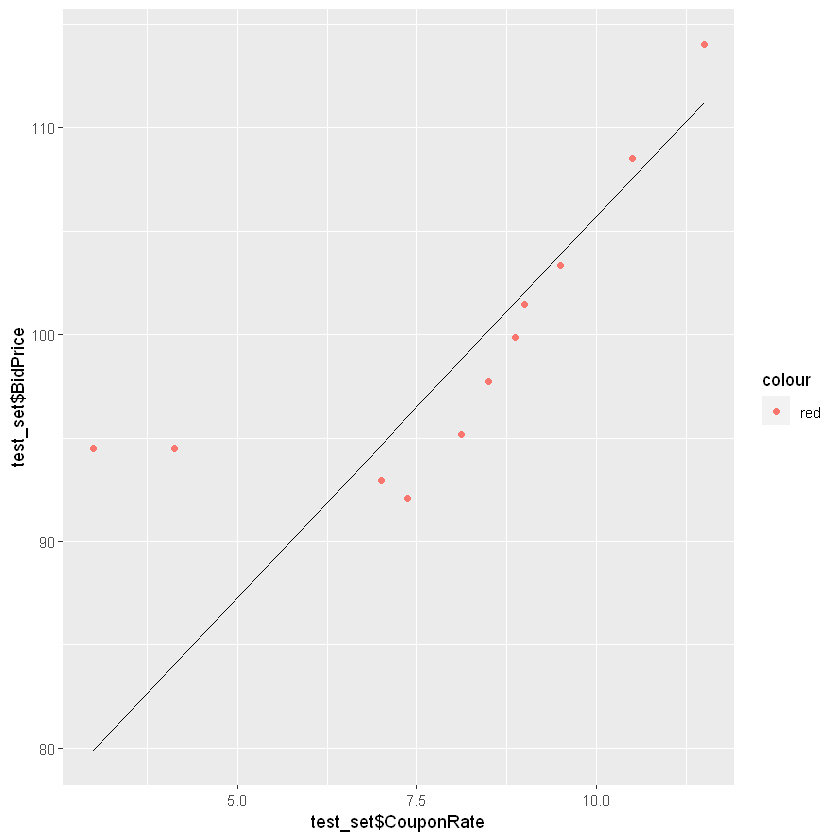

In [115]:
ggplot()+ geom_point(aes(x= test_set$CouponRate,y= test_set$BidPrice, color = 'red'))+
    geom_line(aes(test_set$CouponRate, predict(regression, newdata = test_set, color = 'blue')))
